# Badanie relacji między punktami

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
points_HP=pd.read_csv('dane_tymczasowe_HP.csv')
points_R=pd.read_csv('dane_tymczasowe_R.csv')
points_M=pd.read_csv('dane_tymczasowe_M.csv')

Wykres Morishity

(-1.0, 3.0)

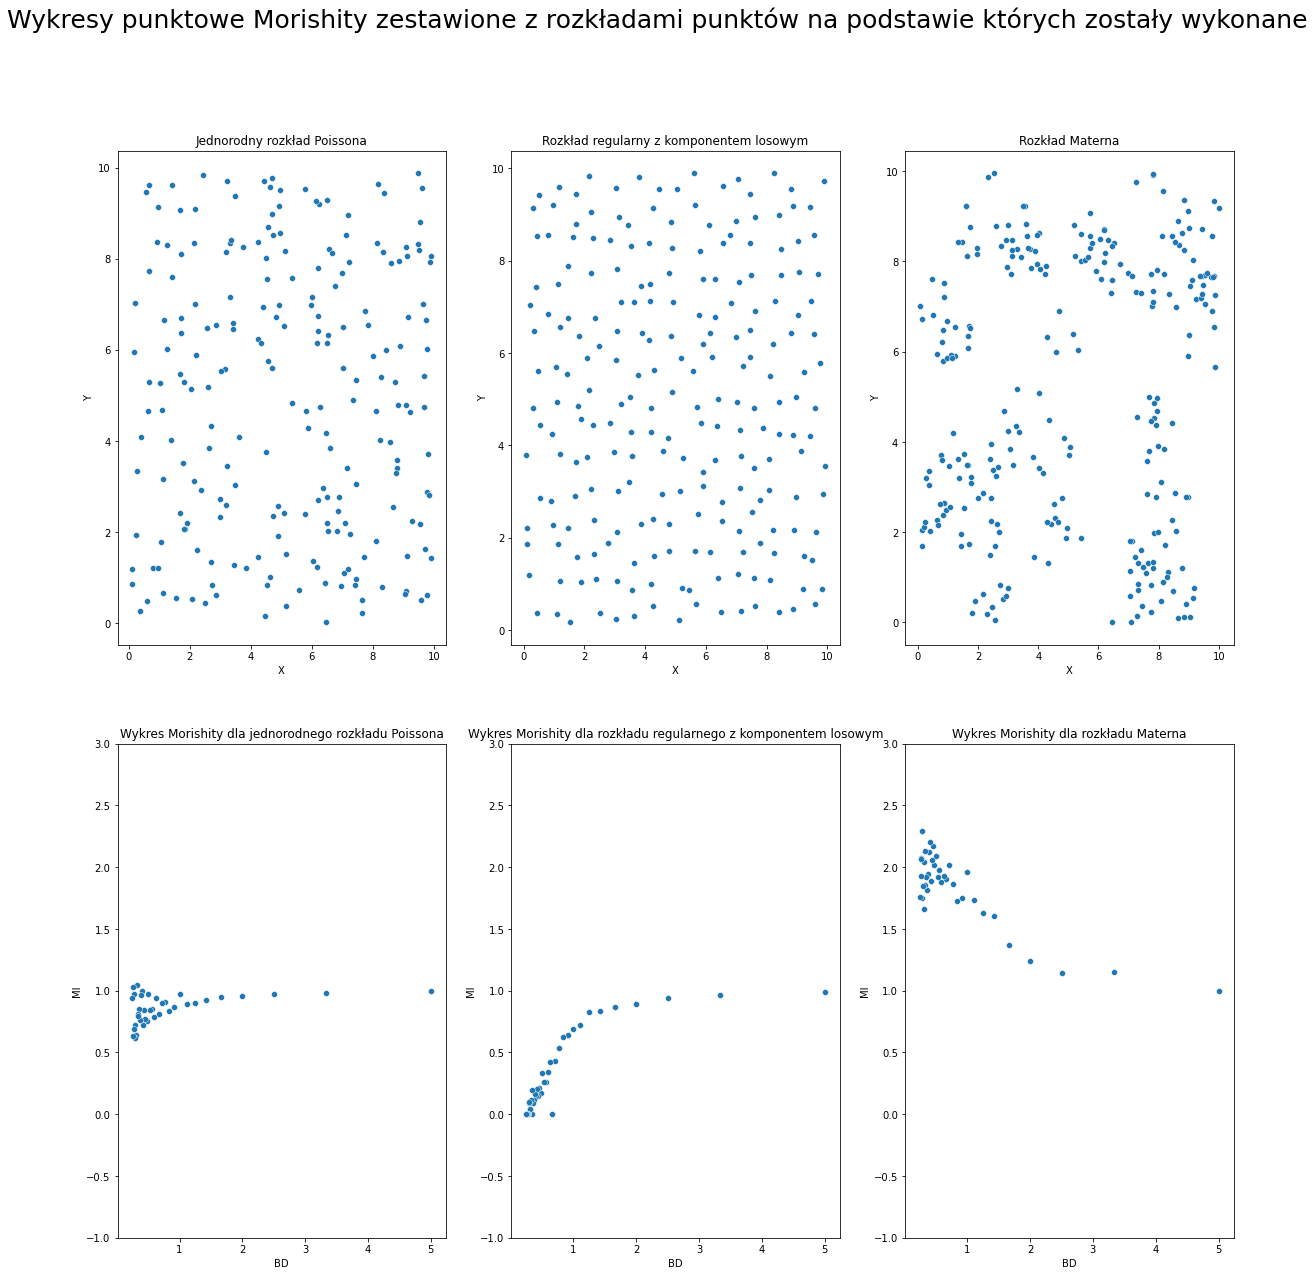

In [3]:
def morishita_plot_data(points, bins_list, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins_list: list
        Lista zawierająca wszystkie zestawy parametrów określających liczbę podobszarów w poziomie i pionie, dla których mają zostać przeprowadzone obliczenia.
        Przykład: [[2, 2], [4, 4], [8, 8], [16, 16]]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    morishita_index: DataFrame
        Tablica zawierająca dwie kolumny:
        - "BD" - długości boków podobszarów,
        - "MI" - wyliczone wartości indeksów MI.
    """
    BD=[]
    MI=[]
    for i in bins_list:
        H,y_lims,x_lims = np.histogram2d(points["Y"], points["X"], bins=[int(i[0]),int(i[1])],range=[[x_lim[0], x_lim[1]], [y_lim[0], y_lim[1]]])
        r=[y_lims[1]-y_lims[0]]
        BD.extend(r)
        s=[i[0]*i[1]*np.sum((H*(H-1))/(points["X"].size*(points["X"].size-1)))]
        MI.extend(s)
    df=pd.DataFrame({'BD':BD,'MI':MI})
    return df

bins_list=np.linspace([2,2],[40,40],39)
m_HP=morishita_plot_data(points_HP, bins_list, [0,10], [0,10])
m_R=morishita_plot_data(points_R, bins_list, [0,10], [0,10])
m_M=morishita_plot_data(points_M, bins_list, [0,10], [0,10])

fig, ax=plt.subplots(2,3,figsize=(20,20))
fig.suptitle("Wykresy punktowe Morishity zestawione z rozkładami punktów na podstawie których zostały wykonane", fontsize=25)
ax[0,0].set_title("Jednorodny rozkład Poissona")
sns.scatterplot(data=points_HP,x="X",y="Y",ax=ax[0,0])

ax[0,1].set_title("Rozkład regularny z komponentem losowym")
sns.scatterplot(data=points_R,x="X",y="Y",ax=ax[0,1])

ax[0,2].set_title("Rozkład Materna")
sns.scatterplot(data=points_M,x="X",y="Y",ax=ax[0,2])

ax[1,0].set_title("Wykres Morishity dla jednorodnego rozkładu Poissona")
s=sns.scatterplot(data=m_HP,x="BD",y="MI",ax=ax[1,0])
s.set_ylim(-1,3)

ax[1,1].set_title("Wykres Morishity dla rozkładu regularnego z komponentem losowym")
s=sns.scatterplot(data=m_R,x="BD",y="MI",ax=ax[1,1])
s.set_ylim(-1,3)

ax[1,2].set_title("Wykres Morishity dla rozkładu Materna")
s=sns.scatterplot(data=m_M,x="BD",y="MI",ax=ax[1,2])
s.set_ylim(-1,3)

Wykres Fry

<AxesSubplot:title={'center':'Wykres Fry dla rozkładu Materna'}, xlabel='X', ylabel='Y'>

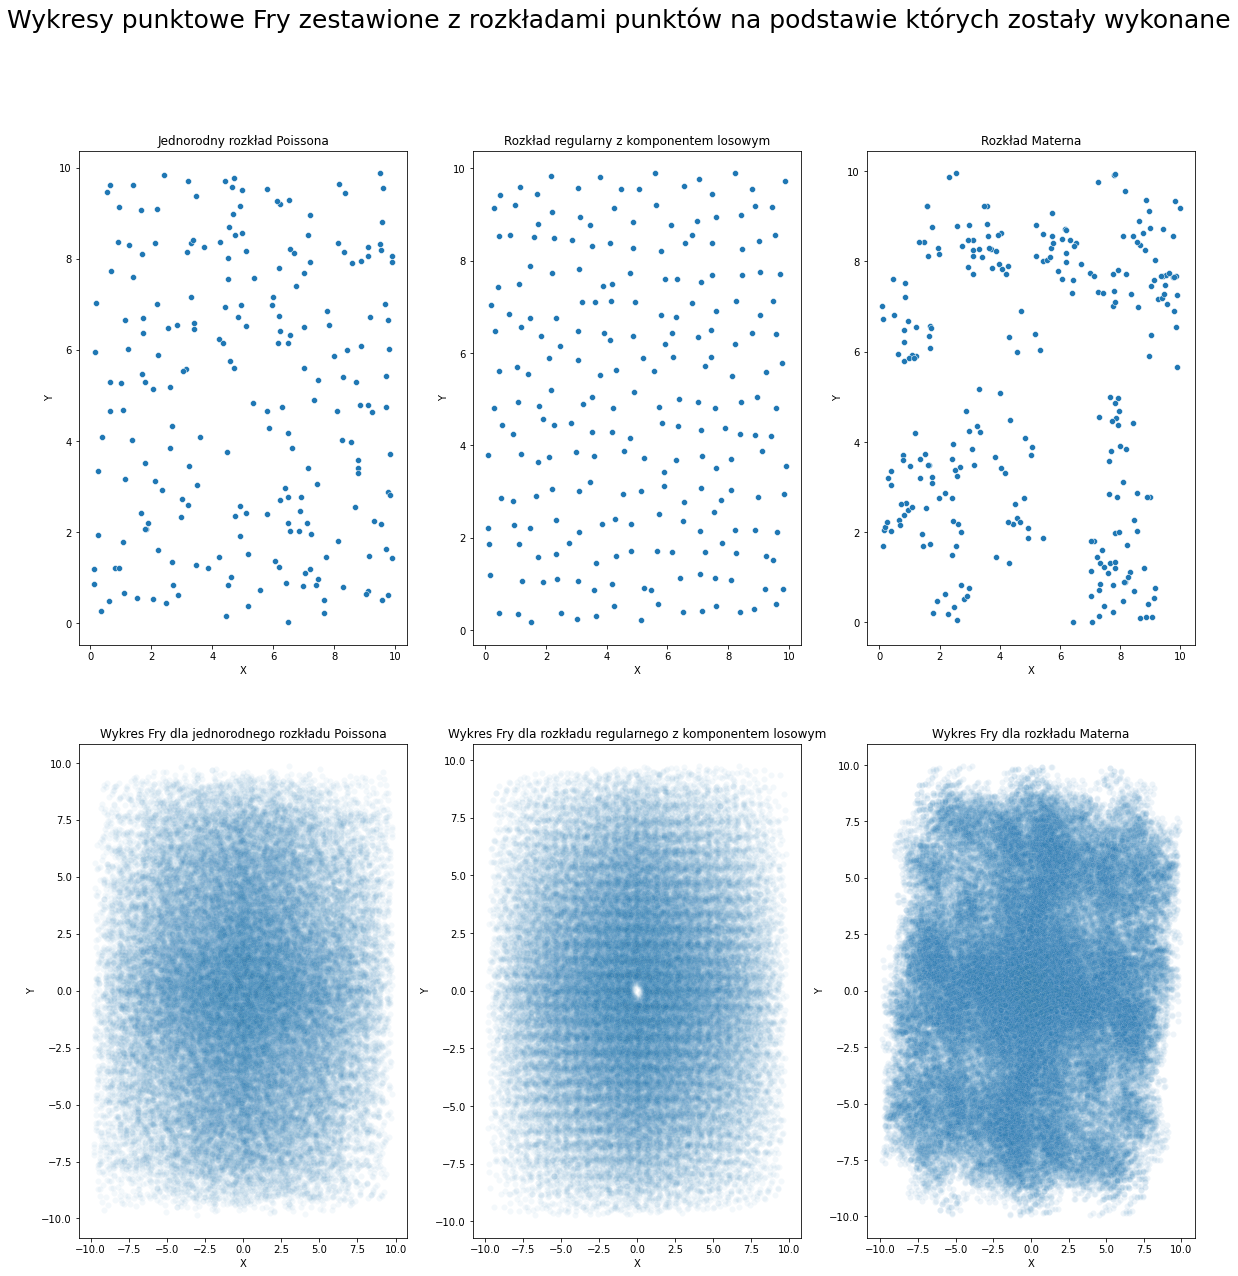

In [4]:
def fry_plot_data(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    fry_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """    
    x=[]
    y=[]
    for i in range(0,np.size(points["X"])):
        pom=points["X"].drop(i)
        x.extend(pom-points["X"][i])
        pom=points["Y"].drop(i)
        y.extend(pom-points["Y"][i])
    return pd.DataFrame({"X":x, "Y":y})

fry_HP=fry_plot_data(points_HP)
fry_R=fry_plot_data(points_R)
fry_M=fry_plot_data(points_M)

fig, ax=plt.subplots(2,3,figsize=(20,20))
fig.suptitle("Wykresy punktowe Fry zestawione z rozkładami punktów na podstawie których zostały wykonane", fontsize=25)
ax[0,0].set_title("Jednorodny rozkład Poissona")
sns.scatterplot(data=points_HP,x="X",y="Y",ax=ax[0,0])

ax[0,1].set_title("Rozkład regularny z komponentem losowym")
sns.scatterplot(data=points_R,x="X",y="Y",ax=ax[0,1])

ax[0,2].set_title("Rozkład Materna")
sns.scatterplot(data=points_M,x="X",y="Y",ax=ax[0,2])

ax[1,0].set_title("Wykres Fry dla jednorodnego rozkładu Poissona")
sns.scatterplot(data=fry_HP,x="X",y="Y",ax=ax[1,0], alpha=0.05)

ax[1,1].set_title("Wykres Fry dla rozkładu regularnego z komponentem losowym")
sns.scatterplot(data=fry_R,x="X",y="Y",ax=ax[1,1],alpha=0.05)

ax[1,2].set_title("Wykres Fry dla rozkładu Materna")
sns.scatterplot(data=fry_M,x="X",y="Y",ax=ax[1,2],alpha=0.075)